# Report for 2D Project Physical World and Digital World

Cohort: 07

Team No.: 07

Members:
* Ang Jing Yuen Andre (1003308)
* Tim Yap Ming En (1003495)
* Cao Bingquan (1003881)
* Dionetta Young (1003735)
* Lan Xiaojin (1003773)

# Introduction

The objective is to overcome the waiting time that is required for a thermometer to reach thermal equilibrium with a water bath before obtaining the temperature. Our solution is to write a program that reads data from a DS18B20 temperature sensor and use machine learning and statistical analysis to predict the actual temperature of a water bath accurately within the range of 10℃ to 60℃ in the shortest time possible. 

Based on experimental data from the Physical World analysis, we found out that the inital gradient of the temperature of the sensor against time graph is linearly related to the temperature of the water bath. The initial gradient of the first 20 seconds can be determined by the temperature sensor and obtained using python code. As such, a linear regression model can be used to predict the temperature of the water bath given the initial gradient of the temperature against time graph. 

# Description of Data from Experiment

## Data Collection

A water bath is set up in an insulated container of volume 2L, for a given temperature of water bath. A laboratory thermometer is then used to record the temperature of the water bath. The temperature sensor is placed in the water bath and not removed to keep track of the temperature reading of the temperature sensor. 

The container has to be insulated such that the heat loss to and from surroundings is minimal such that the temperature of the water bath stays invariant. As such, we used a styrofoam container with a lid. 

For the code, a class called Stopwatch was created to record the time elapsed. 

A function read_temp() instructs the RPi to record the temperature with a temperature sensor DS18B20 in degrees Celsius of the water bath. From 0 to 20 seconds, at a time interval of 0.1 seconds, the function collect_data records both the temperature reading, through the read_temp() function, and elapsed time as a tuple. The function appends this data to a list that it returns at time = 20 seconds. 

A list of tuples containing the float of the elapsed_time and the sensor temperature is then written into a text document onto the RPi and then extracted.

The approach is derived from a physical model. It says that if the assumptions that there is no work done by/on the sensor, and the heat capacity and the thermal conductance of the sensor are independent of the temperature of the sensor, then the temperature of the water bath would vary linearly with the rate of change of temperature of the sensor.
Our approach makes use of this property and takes into account the temperature of the sensor and the elapsed time to find the estimated average initial gradient of the temperature by time graph. We then compare this against the temperature of the water bath. 



In [1]:
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

#Open the test file to extrract the data collected
f = open("Test data.txt", 'r') 

#Used to put the data in a list so that we can manipulate it in python
for i in f:
    ls = list(eval(i))
f.close()


def extract_data():
    Tw_data = []
    grad_2 = []
    grad_avg = []
    for i in range(len(ls)):
        ans = ls[i][-1]
        Tw_data.append(float(ans))
    
    for i in range(len(ls)):
        grad_1 = []
        for j in range(len(ls[i])-1):    
            if ls[i][j][0]>2:
                grad = (ls[i][j][1]-ls[i][0][1])/(ls[i][j][0]-ls[i][0][0])
                grad_1.append(grad)
        
        grad_2.append(grad_1)
        
    for i in range(len(grad_2)):
        avg_grad = sum(grad_2[i])/len(grad_2[i])
        grad_avg.append(avg_grad)
    
    



    avg_grad_1 = np.reshape(grad_avg, [np.size(grad_avg),1])
    Tw_data_1 = np.reshape(Tw_data, [np.size(Tw_data),1])
    
    return avg_grad_1, Tw_data_1


print(extract_data())


(array([[ 2.33869026],
       [ 2.22499932],
       [ 2.20024851],
       [ 2.19131668],
       [ 2.06500958],
       [ 2.17870241],
       [ 2.04963902],
       [ 1.95170069],
       [ 1.99616569],
       [ 2.15229109],
       [ 1.96714688],
       [ 2.09153126],
       [ 1.79178274],
       [ 1.88458582],
       [ 1.72745749],
       [ 1.78132902],
       [ 1.7445255 ],
       [ 1.65427182],
       [ 1.60115305],
       [ 1.56357202],
       [ 1.41093417],
       [ 1.43305237],
       [ 1.41904691],
       [ 1.34167898],
       [ 1.32921523],
       [ 1.27897004],
       [ 1.31130386],
       [ 1.55509185],
       [ 1.19910881],
       [ 1.10950415],
       [ 1.0132929 ],
       [-0.71432488],
       [-0.66755193],
       [-0.58819454],
       [ 2.84377064]]), array([[55.5],
       [54.5],
       [54.1],
       [53.6],
       [53.3],
       [53. ],
       [52.4],
       [52.1],
       [51.6],
       [51.1],
       [50.3],
       [49.9],
       [49.5],
       [48.5],
       [47.6],
  

## Data Preparation

The temperature readings of the sensor, the time elapsed and the temperature of the water bath previously recorded are extracted from the text document.

To prepare the data for fitting into a regression model, the average estimated gradient is found for each data set, given the temperature of the sensor and the time. For each dataset, the average initial gradient and the temperature can be found with the function extract_data(). The function takes a list of data points and calculats the gradient between the first point and all subsequent points in the data list. Then the average of all said gradients are found.


The following is an example of the data. 
e.g. [(0.901, 25.812), (1.941, 29.562), (2.901, 34.937), (3.861, 38.125), (4.901, 40.312), (5.861, 41.875), (6.821, 43.0), (7.781, 44.0), (8.741, 45.0), (9.701, 45.937), (10.661, 46.812), (11.621, 47.625), (12.581, 48.312), (13.541, 48.875), (14.521, 49.375), (15.541, 49.875), (16.501, 50.375), (17.461, 50.812), (18.421, 51.187), (19.381, 51.5), (20.341, 51.75), '55.5']

The function, avg_grad(), then takes the list of data points and calculate the gradient between the first and subsequent points in the list. The gradients are then appended into a new list.

The following is an example of the gradient list. 
e.g. [4.562499999999999, 4.159797297297297, 3.624999999999999, 3.238508064516129, 2.9033783783783784, 2.6436046511627906, 2.4474489795918366, 2.2869318181818175, 2.151639344262295, 2.0347947761194027, 1.9263698630136983, 1.8246044303797466, 1.7300293685756238, 1.6436475409836064, 1.574551282051282, 1.509661835748792, 1.4483447488584473, 1.39004329004329, 1.334259259259259]
The average gradient is then determined. 
e.g. 2.33869025939072

## Data Format

The features of the linear regression model is a numpy 2D array of the estimated average initial gradient from the dataset from the start_time to 20seconds. Labelled as x

The label of the data is a numpy 2D array of the temperature of the water bath.

e.g. x_train = array([[ 1.72745749],
       [ 1.96714688],
       [-0.66755193],
       [ 1.43305237],
       [ 1.19910881],
       [ 1.88458582],
       [ 1.78132902],
       [ 1.41904691],
       [-0.58819454],
       [ 2.15229109],
       [-0.71432488],
       [ 2.17870241],
       [ 1.27897004],
       [ 1.56357202],
       [ 1.31130386],
       [ 1.41093417],
       [ 1.55509185],
       [ 1.7445255 ],
       [ 1.60115305],
       [ 2.20024851],
       [ 1.32921523]])
       
       y_train = array([[47.6],
       [50.3],
       [16.3],
       [43.3],
       [39. ],
       [48.5],
       [47.2],
       [42.9],
       [16.3],
       [51.1],
       [16. ],
       [53. ],
       [41.6],
       [45. ],
       [41.1],
       [44.7],
       [40.1],
       [46.8],
       [45.6],
       [54.1],
       [42.1]])

# Training Model

After obtaining the two numpy arrays, the model is trained by the function linear_regression(avg_grad_1, Tw_data_1, size, seed). 

First the dataset is split into the train set and the test set with thh train_test_split function of sklearn. The dataset is split with (size) of the dataset being the test set and (1-size) of the dataset being the train set at a random_state of (seed). 

The following were the parameters that we used to obtain our dataset. 
e.g. linear_regression(avg_grad_1, Tw_data_1, 0.4, 2752)

After obtaining the train datasets, we fit a linear regression model to the data and return the coefficient and intercept for the prediction model of the temperature of the water.

By plotting the linear regression model, the coefficients and intercept are determined.

Coefficient = 12.83767982

Intercept = 24.57750592

Linear Regression Model:

y = (12.83767982)x + (24.57750592)

The plot of average initial gradient against the temperature for the test datasets have a resulting R-squared value of 0.955 and MSE of 1.874.

The code is included in the following cell.

In [3]:
#to get an equation between temperature and time, we find a relation with ln((T(t)-Tw)/(Tamb-Tw)) and time 
def linear_regression(avg_grad_1, Tw_data_1, size, seed):
    
    x = avg_grad_1
    y = Tw_data_1
    
    #splitting the train and test sets.
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = size, random_state=seed)
   
    #Create linear regression object
    regr = linear_model.LinearRegression()
    
    #Trains the model using the training set
    regr.fit(x_train, y_train)
    
    
    y_pred = regr.predict(x_test)
    
    #intercept 
    intercept = regr.intercept_
    
    #coefficient
    coef= regr.coef_
    
    mse = mean_squared_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)
    
    results = {'coefficients': coef,
               'intercept': intercept,
               'mean squared error': mse,
               'r2 score': r2}
    
    
    return  mse, r2, coef, intercept, x_train, y_train ##c_train[:,[0]], y_train, c_test[:,[0]], y_pred,

avg_grad_1, Tw_data_1 = extract_data()
mse, r2 , coef, intercept,x_train, y_train=linear_regression(avg_grad_1, Tw_data_1, 0.4, 2752)

print("Coefficient: "+str(coef))
print("Intercept: "+str(intercept))

#Mean square average
print("Mean square average: "+str(mse))

#R2 value
print("r2: "+str(r2))


Coefficient: [[12.83767982]]
Intercept: [24.57750592]
Mean square average: 1.873975707720462
r2: 0.9550847144989715


# Verification and Accuracy

The first way to check the accuracy of the model is to use the test dataset that the train_test_split() randomly generated for the model. After comparing the train dataset and the test data set, the r^2 scores and the mean squared error value are as follows:

Mean Squared Error Value = 1.873975707720462
r^2 Score = 0.9550847144989715

Since the r^2 value is close to 1, the model has a high accuracy.

The second way to access the linearity of the model is to look at the scatter plot. The scatter plot shows a clear linear trend of the variables. 

As shown in our actual testing of the model in real-life application, the temperature of water bath is predicted using our linear regression model, and compared with the actual temperature. We were able to obtain values that were within a 5 percent error variation when applying the model to predict the temperature of the water bath. 

    Actual  Predict Percent Error

    59.3    64.5    8.7689713
    56.4    59.5    5.4964539
    50.8    51.8    1.9685039
    44.8    45.1    0.6696429
    40.7    39.7    2.4570025
    36.2    35.6    1.6574586
    31.7    30.6    3.4700315
    25.4    26.2    3.1496063
    20.1    19.9    0.9950249
    15.4    16.5    7.1428571

However, our model could be improved by collecting more datapoints. This would further improve the fit of our train dataset and therefore improve the accuracy of our prediction. 

Another area that needs improvement is the consistency of the prediction. Even though consistent readings could be obtained within the range of the train set, the predictions became inaccurate when the temperature of the water bath became closer to the edge of the range of the dataset. We concluded that there is a range at which the prediction could be made to a reasonable amount of error. 
Further analysis could be done to find such a range and to improve on the model given these limitations. 


Lastly, other methods to predict the temperature could be employed to reinforce the model that we used. Perhaps Tau could be found with the similiar physical model and two predictions could be generated to confirm the reliability of such a model. Alternatively, other models could be employed and the train dataset could be used to predict the temperature as a multivariable linear function with more than one variables with time.


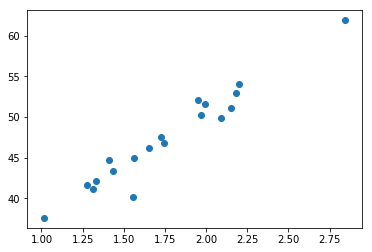

In [16]:
mse, r2, coef, intercept, x_train, y_train = linear_regression(avg_grad_1, Tw_data_1, 0.4, 2752)

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

## Code that is run on the RPi

The following cell is the kivy code that is run on the RPi to show the predicted temperature and the current temperature reading of the temperature sensor

In [3]:


import os
os.environ['KIVY_GL_BACKEND'] = 'gl'
import kivy

from kivy.app import App
from kivy.uix.gridlayout import GridLayout
from kivy.uix.label import Label
from kivy.uix.togglebutton import Button
from kivy.clock import Clock
from kivy.uix.switch import Switch

import time
import glob
import os

os.system('modprobe w1-gpio')
os.system('modprobe w1-therm')

base_dir = '/sys/bus/w1/devices/'
device_folder = glob.glob(base_dir + '28*')[0]
device_file = device_folder + '/w1_slave'

m = 12.83767982
c = 24.57750592

# StopWatch class created to provide us with the time elapsed. 

class StopWatch:
    def __init__(self, start_time = time.time(), end_time = -1):
        self.start_time = start_time
        self.end_time = end_time
        
    def start(self):
        self.start_time = time.time()
        
    def elapsed_time(self):
        x = time.time()
        y = self.start_time
        return round((x - y),3) #return time elapsed in seconds, to 3 dp
    
# StopWatch class created to provide us with the time elapsed.     
sw = StopWatch()


def read_temp_raw():
    f = open(device_file, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_temp():
   lines = read_temp_raw()
   while lines[0].strip()[-3:] != 'YES':
       time.sleep(0.2)
       lines = read_temp_raw()
   equals_pos = lines[1].find('t=')
   if equals_pos != -1:
        temp_string = lines[1][equals_pos +2:]
        temp_c = float(temp_string)/ 1000.0
        
        return temp_c
    
def get_pred(ls):
    start_temp = ls[0][0]
    start_time = ls[0][1]
    grad_1 = []
    for i in range(len(ls)):
        if i != 0:
            grad = (ls[i][0]-start_temp)/(ls[i][1]-start_time)
            grad_1.append(grad)
            
    avg_grad = sum(grad_1)/len(grad_1)
    
            
    Tw = (m*avg_grad)+c
    return Tw
    
#Kivy GUI code
class TemperatureReading(App):

    def build(self):
        sw.start(sw)
        self.ls = []
        self.root = root = GridLayout(rows=3,cols=4)
        self.label_ctime = Label(text="Current Time")
        self.ctime = Label()   
        self.label_ptime = Label(text="Prediction Time")
        self.ptime = Label()
        self.label_tempr = Label(text="Temperature Reading")
        self.tempr = Label()
        self.label_ptemp = Label(text="Predicted Temperature")
        self.ptemp = Label()
        self.start = Button(text="Start", on_press = self.start_exp)
        self.stop = Button(text="Stop", on_press = self.stop_exp)
        
        #Clock.schedule_interval(self.get_time,0.5)

        root.add_widget(self.label_ctime)
        root.add_widget(self.ctime)
        root.add_widget(self.label_ptime)
        root.add_widget(self.ptime)
        root.add_widget(self.label_tempr)
        root.add_widget(self.tempr)
        root.add_widget(self.label_ptemp)
        root.add_widget(self.ptemp)
        root.add_widget(self.start)
        root.add_widget(self.stop)

        return root
    
    event = None
    init_time = None
    
    def start_exp(self,obj):
        self.init_time = time.time()
        self.event = Clock.schedule_interval(self.update_fields, 1)

    def stop_exp(self,obj):
        Clock.unschedule(self.event)
        self.ctime.text = ""
        
        

    def update_fields(self, dt):
        self.ctime.text = str(round(time.time() - self.init_time,2))
        self.ptime.text = "10 s"
        self.tempr.text = str(read_temp())
        if float(self.ctime).text < 7.0:
            self.ls.append((read_temp(),sw.elapsed_time(sw)))
        print(self.ls)
        if float(self.ctime.text) > 7.0:
            self.ptemp.text = get_pred(self.ls)

        
        


if __name__ == '__main__':
    TemperatureReading().run()           


[INFO   ] [Logger      ] Record log in C:\Users\Cao BingQuan\.kivy\logs\kivy_19-04-18_0.txt
[INFO   ] [Kivy        ] v1.10.1
[INFO   ] [Python      ] v3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2


IndexError: list index out of range

# Example Scripts

Instruction:

* Read an excel file with the following format:
```
time (s)	reading
0.00	    25.812
0.90	    28.562
1.79	    31.875
2.68	    35.062
3.55	    37.937
4.43	    40.687
5.30	    43.25
```
where the first column indicates the time in seconds and the second column indicates the sensor reading in Celsius. 
* Write a code to prepare the data, extract the features.
* Write a code to split the data.
* Write a code to train the model.
* Write a code to predict the final temperature.
* Write a code to check accuracy.

**The script below is just for your example. You don't have to use it and you can write your own script.**



In [ ]:
# write a code to read an excel file
import pandas as pd

# specify the base of your filename, e.g. temp_1.xlsx, temp_2.xlsx
filename = 'temp_' 

# if you have more than one files, 
# you can use some key to differentiate them, e.g. '1', '2'
filekeys = [] 

# this is to store the data for different files, 
# the keys are in filekeys
dataframe = {} 
for key in filekeys:
    dataframe[key] = pd.read_excel(filename + key + '.xlsx')


In [ ]:
# write a code to prepare the data for predicting
def preprocess(df):
    # use this function to extract the features from the data frame
    pass

data_processed = {}
for key in filekeys:
    data_processed[key]=preprocess(dataframe[key])

In [ ]:
# write a code to split the data to train and test
def prepare_train_test(data):
    pass

data_train, data_test = prepare_train_test(data_processed)

In [ ]:
# write a code to train the model
# the function should return the trained model
def train_model(data):
    pass

model = train_model(data_train)



In [ ]:
# write a code to predict the final temperature
# store the predicted temperature in a variable called "predicted"
# predicted is a dictionary where the keys are listed in filekey

predicted = {}
for key in filekeys:
    predicted[key]=model.predict(data_test[key])
    

In [ ]:
# write a code to check your accuracy

